In [7]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()
PROJECT_FOLDER = Path().absolute().parent
# import sys
# sys.path.append(str(PROJECT_FOLDER))

# import model_training as mt

In [ ]:

DATA_FOLDER = PROJECT_FOLDER / 'model_training' / 'data'
DATA_FILE = DATA_FOLDER / 'stable' / 'simulation_data_1_r1_r2.json'
DATA_FILE = DATA_FOLDER / 'simulation_data_testing.json'
DATA_FILE = DATA_FOLDER / 'arena_simulation4.json'

DATA_FILE.absolute()
# DATA_FILE.exists()
raw_data_df = pd.read_json(DATA_FILE)
print(raw_data_df.shape)
raw_data_df.head()

(21501, 9)


,game_id,player_one_id,player_two_id,winner_id,first_mover_id,moves,turns,start_time,end_time
0,1732062582479595-088485-6bb12f80,monte_carlo_150,monte_carlo_200,monte_carlo_200,monte_carlo_150,"[6, 3, 3, 2, 5, 1, 0, 4]",8,2024-11-19 18:29:42.479595,2024-11-19 18:29:53.626601
1,1732062593626601-338349-d4d26617,monte_carlo_200,monte_carlo_150,monte_carlo_150,monte_carlo_200,"[1, 1, 3, 1, 4, 2, 6, 5, 5, 1, 1, 0, 4, 3, 4, ...",24,2024-11-19 18:29:53.626601,2024-11-19 18:30:02.919707
2,1732062602919708-655067-e5b29a33,monte_carlo_150,monte_carlo_200,monte_carlo_200,monte_carlo_150,"[3, 3, 2, 4, 0, 1, 4, 3, 2, 3, 3, 2, 0, 1, 2, ...",18,2024-11-19 18:30:02.919707,2024-11-19 18:30:11.597450
3,1732062611597450-383008-90eaaf82,monte_carlo_200,monte_carlo_150,monte_carlo_150,monte_carlo_200,"[4, 4, 5, 2, 3, 6, 3, 4, 3, 3, 5, 4, 4, 3, 5, ...",24,2024-11-19 18:30:11.597450,2024-11-19 18:30:22.475566
4,1732062622475566-941162-14f8824b,monte_carlo_200,monte_carlo_150,monte_carlo_200,monte_carlo_200,"[3, 5, 2, 4, 0, 1, 2, 1, 2, 2, 3, 4, 3, 3, 4, ...",27,2024-11-19 18:30:22.475566,2024-11-19 18:30:31.952300


# Load Data

In [29]:
raw_data_df = pd.read_json(DATA_FILE)
print(raw_data_df.shape)
raw_data_df.head()

(2001, 7)


,game_id,player_one_id,player_two_id,winner_id,first_mover_id,moves,turns
0,1731877338926014-313026-dfd03d46,monte_carlo_50,monte_carlo_200,monte_carlo_200,monte_carlo_50,"[2, 5, 2, 4, 0, 3, 6, 2, 4, 3, 3, 5, 3, 5, 5, ...",42
1,1731877383226884-899336-1e5dcfb5,random_naive,monte_carlo_500,monte_carlo_500,random_naive,"[3, 3, 6, 3, 1, 3, 2, 3]",8
2,1731877406489089-634971-504d60a5,random_not_stupid,random_naive,random_not_stupid,random_not_stupid,"[1, 2, 0, 2, 2, 0, 4, 0, 0, 5, 1, 3, 3, 4, 3, ...",17
3,1731877406489619-734997-a801c867,random_naive,random_not_stupid,random_not_stupid,random_naive,"[0, 2, 6, 5, 2, 6, 4, 4, 1, 1, 5, 1, 0, 2, 5, ...",28
4,1731877406489619-209807-735741d8,random_naive,monte_carlo_1000,monte_carlo_1000,random_naive,"[6, 3, 2, 3, 0, 3, 3, 2, 1, 1, 1, 0]",12


# Analysis

In [30]:
data_df = raw_data_df.copy()
data_df = data_df.drop(columns=['game_id'])

In [31]:
# Who won the most games? in %
data_df['winner_id'].value_counts(normalize=True) * 100

winner_id
monte_carlo_1000     20.189905
monte_carlo_500      20.089955
monte_carlo_200      19.290355
monte_carlo_100      17.291354
monte_carlo_50       14.292854
random_not_stupid     7.796102
Tie                   0.849575
random_naive          0.199900
Name: proportion, dtype: float64

In [32]:
# Create indicator columns  for all of the players 
players = list(set(data_df['player_one_id'].to_list() +  data_df['player_two_id'].to_list()))
players

for player in players:
    data_df[player] = (data_df['player_one_id'] == player) | (data_df['player_two_id'] == player)

data_df.head(2)

,player_one_id,player_two_id,winner_id,first_mover_id,moves,turns,monte_carlo_1000,monte_carlo_200,monte_carlo_100,monte_carlo_500,monte_carlo_50,random_naive,random_not_stupid
0,monte_carlo_50,monte_carlo_200,monte_carlo_200,monte_carlo_50,"[2, 5, 2, 4, 0, 3, 6, 2, 4, 3, 3, 5, 3, 5, 5, ...",42,False,True,False,False,True,False,False
1,random_naive,monte_carlo_500,monte_carlo_500,random_naive,"[3, 3, 6, 3, 1, 3, 2, 3]",8,False,False,False,True,False,True,False


In [33]:
data_df[players].sum()

monte_carlo_1000     590
monte_carlo_200      578
monte_carlo_100      569
monte_carlo_500      552
monte_carlo_50       558
random_naive         554
random_not_stupid    601
dtype: int64

In [34]:
players = [
 'random_naive',
 'random_not_stupid',
 'monte_carlo_50',
 'monte_carlo_100',
 'monte_carlo_200',
 'monte_carlo_500', 
 'monte_carlo_1000',
]


def calculate_win_rate(data_df, target_player):
    target_df = data_df[data_df[target_player]]
    results_df = pd.DataFrame(index=players)
    
    for player in players:
        if player == target_player:
            continue
        subset_df = target_df[target_df[player]]
        games_played = subset_df.shape[0]
        games_won = subset_df[subset_df['winner_id'] == target_player].shape[0]
        win_rate = games_won / games_played if games_played > 0 else 0
        results_df.loc[player, 'games_played'] = games_played
        results_df.loc[player, 'games_won'] = games_won
        results_df.loc[player, 'ties'] = subset_df[subset_df['winner_id'] == 'Tie'].shape[0]
        results_df.loc[player, 'win_rate'] = win_rate * 100
        results_df.loc[player, 'tie_rate'] = results_df.loc[player, 'ties'] / games_played * 100

    return results_df



for player in players:
    print(player)
    display(calculate_win_rate(data_df, player))


random_naive


,games_played,games_won,ties,win_rate,tie_rate
random_naive,NaN,NaN,NaN,NaN,NaN
random_not_stupid,102.0,4.0,0.0,3.921569,0.0
monte_carlo_50,83.0,0.0,0.0,0.000000,0.0
monte_carlo_100,84.0,0.0,0.0,0.000000,0.0
monte_carlo_200,105.0,0.0,0.0,0.000000,0.0
monte_carlo_500,68.0,0.0,0.0,0.000000,0.0
monte_carlo_1000,112.0,0.0,0.0,0.000000,0.0


random_not_stupid


,games_played,games_won,ties,win_rate,tie_rate
random_naive,102.0,98.0,0.0,96.078431,0.000000
random_not_stupid,NaN,NaN,NaN,NaN,NaN
monte_carlo_50,90.0,15.0,5.0,16.666667,5.555556
monte_carlo_100,98.0,13.0,2.0,13.265306,2.040816
monte_carlo_200,87.0,8.0,0.0,9.195402,0.000000
monte_carlo_500,105.0,10.0,1.0,9.523810,0.952381
monte_carlo_1000,119.0,12.0,0.0,10.084034,0.000000


monte_carlo_50


,games_played,games_won,ties,win_rate,tie_rate
random_naive,83.0,83.0,0.0,100.000000,0.000000
random_not_stupid,90.0,70.0,5.0,77.777778,5.555556
monte_carlo_50,NaN,NaN,NaN,NaN,NaN
monte_carlo_100,101.0,39.0,1.0,38.613861,0.990099
monte_carlo_200,98.0,35.0,2.0,35.714286,2.040816
monte_carlo_500,99.0,25.0,2.0,25.252525,2.020202
monte_carlo_1000,87.0,34.0,1.0,39.080460,1.149425


monte_carlo_100


,games_played,games_won,ties,win_rate,tie_rate
random_naive,84.0,84.0,0.0,100.000000,0.000000
random_not_stupid,98.0,83.0,2.0,84.693878,2.040816
monte_carlo_50,101.0,61.0,1.0,60.396040,0.990099
monte_carlo_100,NaN,NaN,NaN,NaN,NaN
monte_carlo_200,101.0,45.0,0.0,44.554455,0.000000
monte_carlo_500,101.0,40.0,0.0,39.603960,0.000000
monte_carlo_1000,84.0,33.0,0.0,39.285714,0.000000


monte_carlo_200


,games_played,games_won,ties,win_rate,tie_rate
random_naive,105.0,105.0,0.0,100.000000,0.000000
random_not_stupid,87.0,79.0,0.0,90.804598,0.000000
monte_carlo_50,98.0,61.0,2.0,62.244898,2.040816
monte_carlo_100,101.0,56.0,0.0,55.445545,0.000000
monte_carlo_200,NaN,NaN,NaN,NaN,NaN
monte_carlo_500,89.0,40.0,1.0,44.943820,1.123596
monte_carlo_1000,98.0,45.0,1.0,45.918367,1.020408


monte_carlo_500


,games_played,games_won,ties,win_rate,tie_rate
random_naive,68.0,68.0,0.0,100.000000,0.000000
random_not_stupid,105.0,94.0,1.0,89.523810,0.952381
monte_carlo_50,99.0,72.0,2.0,72.727273,2.020202
monte_carlo_100,101.0,61.0,0.0,60.396040,0.000000
monte_carlo_200,89.0,48.0,1.0,53.932584,1.123596
monte_carlo_500,NaN,NaN,NaN,NaN,NaN
monte_carlo_1000,90.0,59.0,1.0,65.555556,1.111111


monte_carlo_1000


,games_played,games_won,ties,win_rate,tie_rate
random_naive,112.0,112.0,0.0,100.000000,0.000000
random_not_stupid,119.0,107.0,0.0,89.915966,0.000000
monte_carlo_50,87.0,52.0,1.0,59.770115,1.149425
monte_carlo_100,84.0,51.0,0.0,60.714286,0.000000
monte_carlo_200,98.0,52.0,1.0,53.061224,1.020408
monte_carlo_500,90.0,30.0,1.0,33.333333,1.111111
monte_carlo_1000,NaN,NaN,NaN,NaN,NaN


## Turn Counts

<Axes: xlabel='turns', ylabel='Count'>

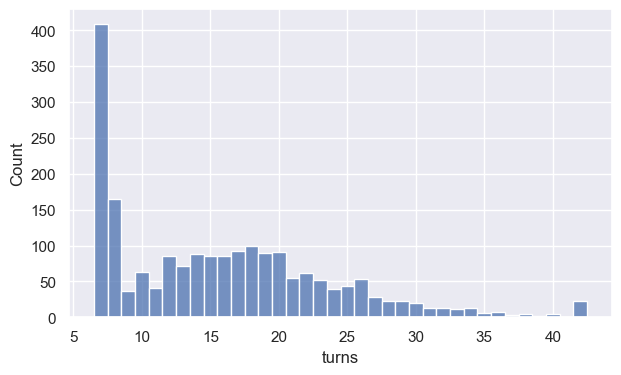

In [35]:
# turn_distribution = data_df.turns.value_counts()
fig, ax = plt.subplots(figsize = (7, 4))
sns.histplot(data_df.turns, ax=ax,binwidth=1, discrete=True)